In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r'C:\Users\surap\Downloads\archive\master.csv')

In [3]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
data.shape

(27820, 12)

In [5]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [6]:
data = data.drop(columns=['HDI for year', 'suicides/100k pop'])
data=data.drop_duplicates(keep='first')
data.dropna()

,country,year,sex,age,suicides_no,population,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,Albania1987,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,Uzbekistan2014,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,Uzbekistan2014,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,Uzbekistan2014,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,Uzbekistan2014,"63,067,077,179",2309,Generation Z


In [7]:
data = data.rename(columns={
    ' gdp_for_year ($) ': 'gdp_for_year',
    'gdp_per_capita ($)': 'gdp_per_capita',
    'country-year': 'country_year'
})

In [8]:
data.columns


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'country_year', 'gdp_for_year', 'gdp_per_capita', 'generation'],
      dtype='object')

In [9]:
data = data[data['year'] != 2016]

In [10]:
country_counts = data['country'].value_counts() / 12
countries_to_exclude = country_counts[country_counts <= 3].index
data = data[~data['country'].isin(countries_to_exclude)]

In [11]:
data['age'] = data['age'].str.replace(' years', '')

In [12]:
data['sex'] = data['sex'].str.capitalize()

In [13]:
country_to_continent = {
    'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa', 'Andorra': 'Europe', 
    'Angola': 'Africa', 'Argentina': 'South America', 'Armenia': 'Asia', 'Australia': 'Oceania', 
    'Austria': 'Europe', 'Azerbaijan': 'Asia', 'Bahamas': 'North America', 'Bahrain': 'Asia', 
    'Bangladesh': 'Asia', 'Barbados': 'North America', 'Belarus': 'Europe', 'Belgium': 'Europe', 
    'Belize': 'North America', 'Benin': 'Africa', 'Bhutan': 'Asia', 'Bolivia': 'South America', 
    'Bosnia and Herzegovina': 'Europe', 'Botswana': 'Africa', 'Brazil': 'South America', 
    'Brunei Darussalam': 'Asia', 'Bulgaria': 'Europe', 'Burkina Faso': 'Africa', 'Burundi': 'Africa', 
    'Cabo Verde': 'Africa', 'Cambodia': 'Asia', 'Cameroon': 'Africa', 'Canada': 'North America', 
    'Central African Republic': 'Africa', 'Chad': 'Africa', 'Chile': 'South America', 'China': 'Asia', 
    'Colombia': 'South America', 'Comoros': 'Africa', 'Congo': 'Africa', 'Costa Rica': 'North America', 
    'Croatia': 'Europe', 'Cuba': 'North America', 'Cyprus': 'Asia', 'Czech Republic': 'Europe', 
    'Denmark': 'Europe', 'Djibouti': 'Africa', 'Dominica': 'North America', 'Dominican Republic': 'North America', 
    'Ecuador': 'South America', 'Egypt': 'Africa', 'El Salvador': 'North America', 'Equatorial Guinea': 'Africa', 
    'Eritrea': 'Africa', 'Estonia': 'Europe', 'Eswatini': 'Africa', 'Ethiopia': 'Africa', 'Fiji': 'Oceania', 
    'Finland': 'Europe', 'France': 'Europe', 'Gabon': 'Africa', 'Gambia': 'Africa', 'Georgia': 'Asia', 
    'Germany': 'Europe', 'Ghana': 'Africa', 'Greece': 'Europe', 'Grenada': 'North America', 'Guatemala': 'North America', 
    'Guinea': 'Africa', 'Guinea-Bissau': 'Africa', 'Guyana': 'South America', 'Haiti': 'North America', 
    'Honduras': 'North America', 'Hungary': 'Europe', 'Iceland': 'Europe', 'India': 'Asia', 'Indonesia': 'Asia', 
    'Iran': 'Asia', 'Iraq': 'Asia', 'Ireland': 'Europe', 'Israel': 'Asia', 'Italy': 'Europe', 'Jamaica': 'North America', 
    'Japan': 'Asia', 'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Kiribati': 'Oceania', 
    'Kuwait': 'Asia', 'Kyrgyzstan': 'Asia', 'Lao People\'s Democratic Republic': 'Asia', 'Latvia': 'Europe', 
    'Lebanon': 'Asia', 'Lesotho': 'Africa', 'Liberia': 'Africa', 'Libya': 'Africa', 'Lithuania': 'Europe', 
    'Luxembourg': 'Europe', 'Madagascar': 'Africa', 'Malawi': 'Africa', 'Malaysia': 'Asia', 'Maldives': 'Asia', 
    'Mali': 'Africa', 'Malta': 'Europe', 'Marshall Islands': 'Oceania', 'Mauritania': 'Africa', 'Mauritius': 'Africa', 
    'Mexico': 'North America', 'Micronesia (Federated States of)': 'Oceania', 'Monaco': 'Europe', 'Mongolia': 'Asia', 
    'Montenegro': 'Europe', 'Morocco': 'Africa', 'Mozambique': 'Africa', 'Myanmar': 'Asia', 'Namibia': 'Africa', 
    'Nauru': 'Oceania', 'Nepal': 'Asia', 'Netherlands': 'Europe', 'New Zealand': 'Oceania', 'Nicaragua': 'North America', 
    'Niger': 'Africa', 'Nigeria': 'Africa', 'North Macedonia': 'Europe', 'Norway': 'Europe', 'Oman': 'Asia', 
    'Pakistan': 'Asia', 'Palau': 'Oceania', 'Panama': 'North America', 'Papua New Guinea': 'Oceania', 'Paraguay': 'South America', 
    'Peru': 'South America', 'Philippines': 'Asia', 'Poland': 'Europe', 'Portugal': 'Europe', 'Qatar': 'Asia', 
    'Republic of Korea': 'Asia', 'Republic of Moldova': 'Europe', 'Romania': 'Europe', 'Russian Federation': 'Europe', 
    'Rwanda': 'Africa', 'Saint Kitts and Nevis': 'North America', 'Saint Lucia': 'North America', 'Saint Vincent and the Grenadines': 'North America', 
    'Samoa': 'Oceania', 'San Marino': 'Europe', 'Sao Tome and Principe': 'Africa', 'Saudi Arabia': 'Asia', 'Senegal': 'Africa', 
    'Serbia': 'Europe', 'Seychelles': 'Africa', 'Sierra Leone': 'Africa', 'Singapore': 'Asia', 'Slovakia': 'Europe', 
    'Slovenia': 'Europe', 'Solomon Islands': 'Oceania', 'Somalia': 'Africa', 'South Africa': 'Africa', 'South Sudan': 'Africa', 
    'Spain': 'Europe', 'Sri Lanka': 'Asia', 'Sudan': 'Africa', 'Suriname': 'South America', 'Sweden': 'Europe', 'Switzerland': 'Europe', 
    'Syrian Arab Republic': 'Asia', 'Tajikistan': 'Asia', 'Thailand': 'Asia', 'Timor-Leste': 'Asia', 'Togo': 'Africa', 
    'Tonga': 'Oceania', 'Trinidad and Tobago': 'North America', 'Tunisia': 'Africa', 'Turkey': 'Asia', 'Turkmenistan': 'Asia', 
    'Tuvalu': 'Oceania', 'Uganda': 'Africa', 'Ukraine': 'Europe', 'United Arab Emirates': 'Asia', 'United Kingdom': 'Europe', 
    'United Republic of Tanzania': 'Africa', 'United States of America': 'North America', 'Uruguay': 'South America', 
    'Uzbekistan': 'Asia', 'Vanuatu': 'Oceania', 'Venezuela (Bolivarian Republic of)': 'South America', 'Viet Nam': 'Asia', 
    'Yemen': 'Asia', 'Zambia': 'Africa', 'Zimbabwe': 'Africa'
}

# Map countries to continents
data['continent'] = data['country'].map(country_to_continent)
data['continent'].fillna('Unknown', inplace=True)

data = data[data['continent'] != 'Unknown']

C:\Users\surap\AppData\Local\Temp\ipykernel_2916\4178576736.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['continent'].fillna('Unknown', inplace=True)


In [14]:
# Convert nominal columns to category type
data[['country', 'sex', 'continent']] = data[['country', 'sex', 'continent']].astype('category')
# Convert age to an ordered categorical type
age_order = ["5-14", "15-24", "25-34", "35-54", "55-74", "75+"]
data['age'] = pd.Categorical(data['age'], categories=age_order, ordered=True)
generation_order = ["G.I. Generation", "Silent", "Boomers", "Generation X", "Millenials", "Generation Z"]
data['generation'] = pd.Categorical(data['generation'], categories=generation_order, ordered=True) 

In [35]:
data.to_csv('cleaned_data.csv', index=False)

In [15]:
global_average = (data['suicides_no'].sum() / data['population'].sum()) * 100000

In [17]:
global_average

np.float64(13.228135803576173)

In [18]:
# Summarize the data
summary_data = data.groupby('year').agg({
    'population': 'sum',
    'suicides_no': 'sum'
}).reset_index()
summary_data['suicides_per_100k'] = (summary_data['suicides_no'] / summary_data['population']) * 100000

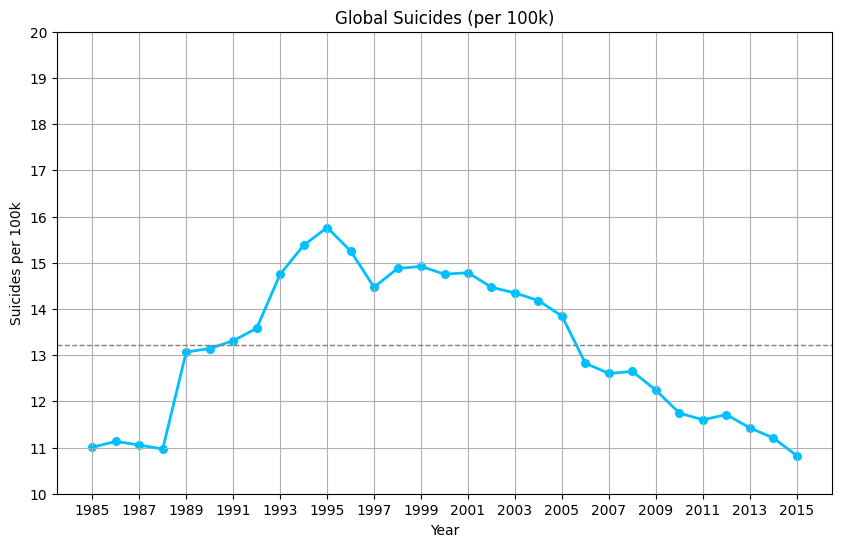

In [19]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=summary_data, x='year', y='suicides_per_100k', color='deepskyblue', linewidth=2)
sns.scatterplot(data=summary_data, x='year', y='suicides_per_100k', color='deepskyblue', s=50)
plt.axhline(global_average, color='grey', linestyle='--', linewidth=1)
plt.title('Global Suicides (per 100k)')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k')
plt.xticks(ticks=np.arange(1985, 2016, 2))
plt.yticks(ticks=np.arange(10, 21, 1))
plt.grid(True)
plt.show()

In [48]:
# Find the row with the maximum suicide rate (suicides_per_100k)
peak_row = summary_data.loc[summary_data['suicides_per_100k'].idxmax()]

# Extract the year and suicide rate at the peak
peak_year = peak_row['year']
peak_suicide_rate = peak_row['suicides_per_100k']

# Print the result
print(f"Peak Suicide Rate: {peak_suicide_rate} per 100k people in the year {peak_year}")

#2015
data_2015 = summary_data[summary_data['year'] == 2015]

# Get the suicides per 100k in 2015
deaths_per_100k_2015 = data_2015['suicides_per_100k'].values[0]

# Print the result
print(f"Deaths per 100k in 2015: {deaths_per_100k_2015}")

Peak Suicide Rate: 15.762241577072235 per 100k people in the year 1995.0
Deaths per 100k in 2015: 10.824607587001662


In [22]:
# Group by continent and calculate the total suicides and population
continent_summary = data.groupby('continent', observed=False).agg({
    'suicides_no': 'sum',
    'population': 'sum'
}).reset_index()

# Calculate suicides per 100k population
continent_summary['suicide_per_100k'] = (continent_summary['suicides_no'] / continent_summary['population']) * 100000

# Sort by suicides per 100k
continent_summary = continent_summary.sort_values('suicide_per_100k')

# Set continent as a categorical variable with the sorted order
continent_summary['continent'] = pd.Categorical(
    continent_summary['continent'], 
    categories=continent_summary['continent'], 
    ordered=True
)



C:\Users\surap\AppData\Local\Temp\ipykernel_2916\1720226784.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=continent_summary, x='continent', y='suicide_per_100k', palette='viridis')


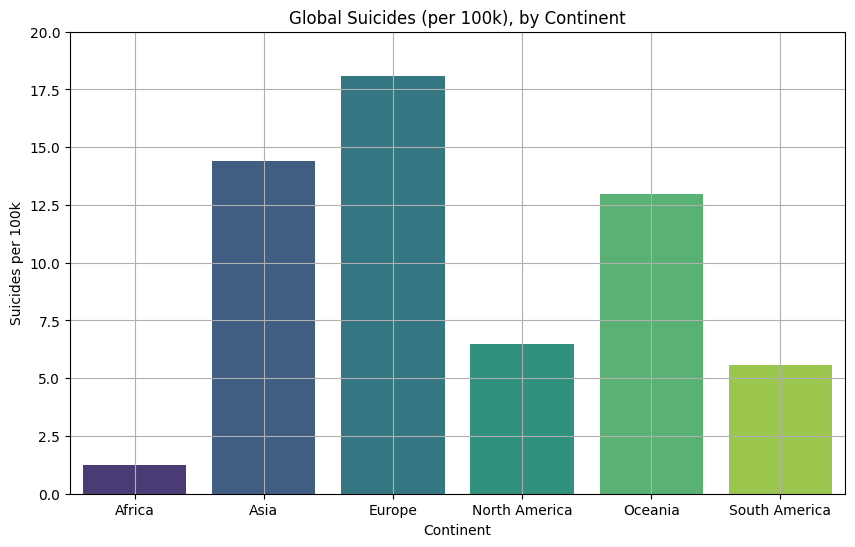

In [23]:
# Plotting suicide rates by continent
plt.figure(figsize=(10, 6))
sns.barplot(data=continent_summary, x='continent', y='suicide_per_100k', palette='viridis')
plt.title('Global Suicides (per 100k), by Continent')
plt.xlabel('Continent')
plt.ylabel('Suicides per 100k')
plt.ylim(0, 20)
plt.grid(True)
plt.show()

C:\Users\surap\AppData\Local\Temp\ipykernel_3284\4226213447.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  continent_time_summary = data.groupby(['year', 'continent']).agg({


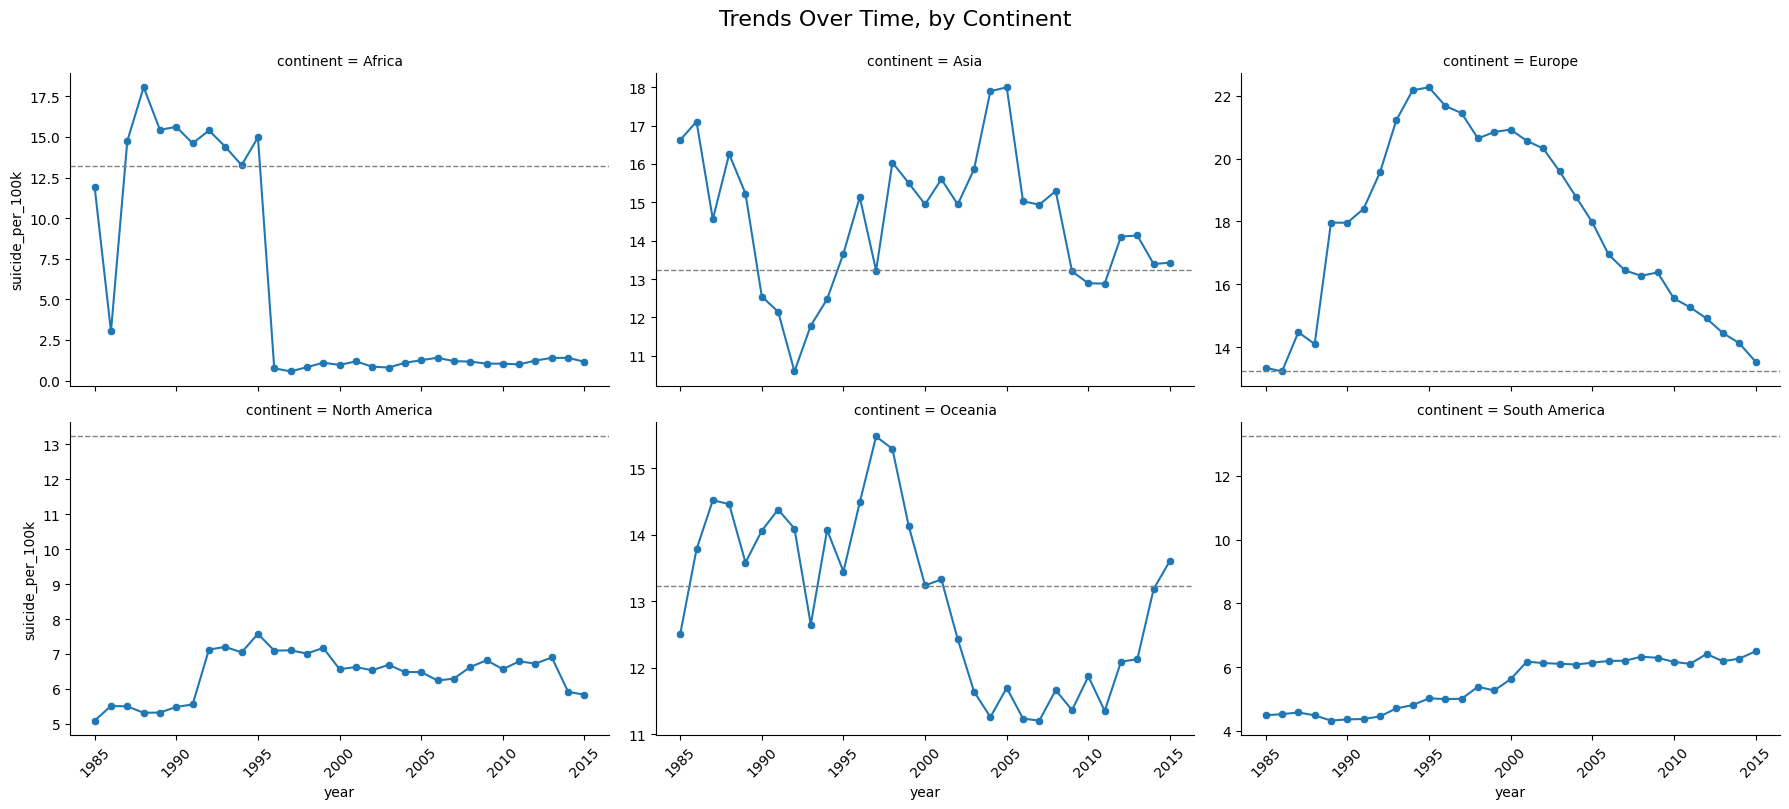

In [22]:
#Trends over time by continent
continent_time_summary = data.groupby(['year', 'continent']).agg({
    'suicides_no': 'sum',
    'population': 'sum'
}).reset_index()
continent_time_summary['suicide_per_100k'] = (continent_time_summary['suicides_no'] / continent_time_summary['population']) * 100000

# Set categories for continents to ensure consistent ordering
continent_categories = continent_summary['continent'].cat.categories
continent_time_summary['continent'] = pd.Categorical(continent_time_summary['continent'], categories=continent_categories, ordered=True)

# Plotting trends over time by continent
g = sns.FacetGrid(continent_time_summary, col='continent', col_wrap=3, sharey=False, height=4, aspect=1.5)
g = g.map(sns.lineplot, 'year', 'suicide_per_100k')
g = g.map(sns.scatterplot, 'year', 'suicide_per_100k')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Trends Over Time, by Continent', size=16)
for ax in g.axes:
    ax.axhline(global_average, color='grey', linestyle='--', linewidth=1)
    ax.set_xticks(range(1985, 2016, 5))
    ax.set_xticklabels(range(1985, 2016, 5), rotation=45)
plt.show()

C:\Users\surap\AppData\Local\Temp\ipykernel_2916\121953907.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sex_summary = data.groupby('sex').agg({
C:\Users\surap\AppData\Local\Temp\ipykernel_2916\121953907.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sex', loc='upper right')


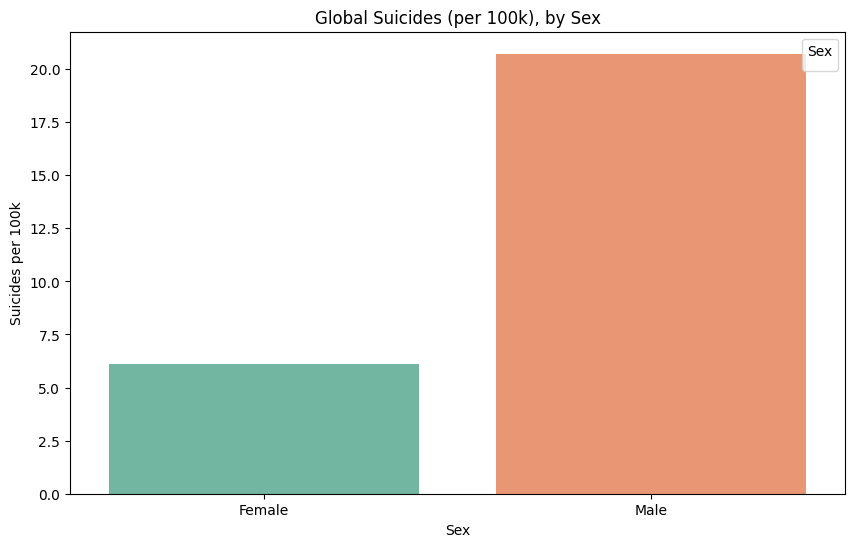

C:\Users\surap\AppData\Local\Temp\ipykernel_2916\121953907.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sex_time_summary = data.groupby(['year', 'sex']).agg({


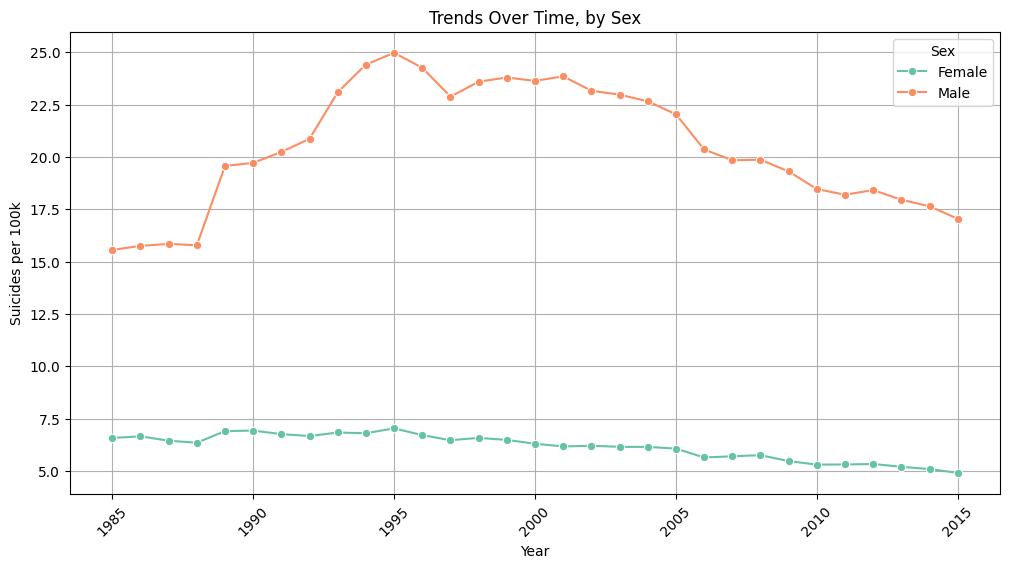

In [24]:

# Calculate suicide rate per 100k by sex
sex_summary = data.groupby('sex').agg({
    'suicides_no': 'sum',
    'population': 'sum'
}).reset_index()
sex_summary['suicide_per_100k'] = (sex_summary['suicides_no'] / sex_summary['population']) * 100000

# Bar plot for suicide rate by sex
plt.figure(figsize=(10, 6))
sns.barplot(data=sex_summary, x='sex', y='suicide_per_100k', hue='sex', palette='Set2')
plt.title('Global Suicides (per 100k), by Sex')
plt.xlabel('Sex')
plt.ylabel('Suicides per 100k')
plt.legend(title='Sex', loc='upper right')
plt.xticks(rotation=0)
plt.show()

# Calculate suicide rate per 100k by year and sex
sex_time_summary = data.groupby(['year', 'sex']).agg({
    'suicides_no': 'sum',
    'population': 'sum'
}).reset_index()
sex_time_summary['suicide_per_100k'] = (sex_time_summary['suicides_no'] / sex_time_summary['population']) * 100000

# Line plot for trends over time by sex
plt.figure(figsize=(12, 6))
sns.lineplot(data=sex_time_summary, x='year', y='suicide_per_100k', hue='sex', marker='o', palette='Set2')
plt.title('Trends Over Time, by Sex')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k')
plt.legend(title='Sex', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\surap\AppData\Local\Temp\ipykernel_3284\2589593774.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_summary = data.groupby('age').agg({
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


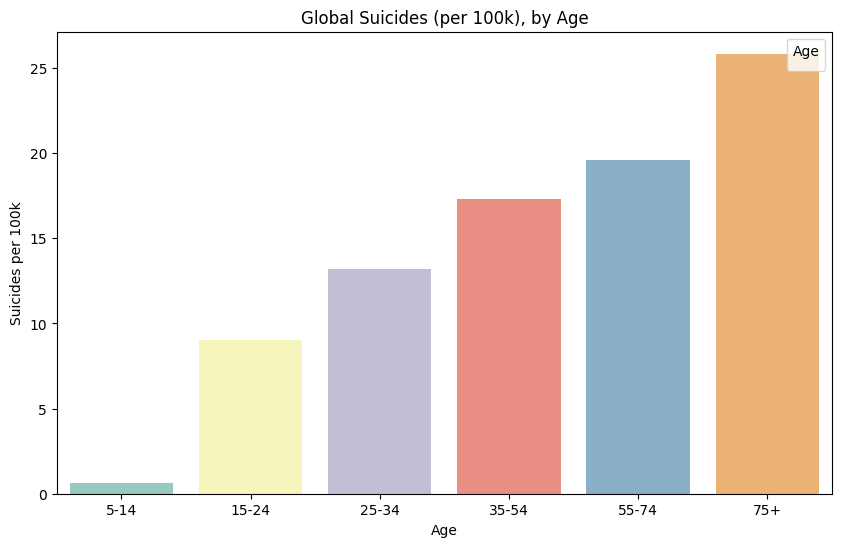

C:\Users\surap\AppData\Local\Temp\ipykernel_3284\2589593774.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_time_summary = data.groupby(['year', 'age']).agg({


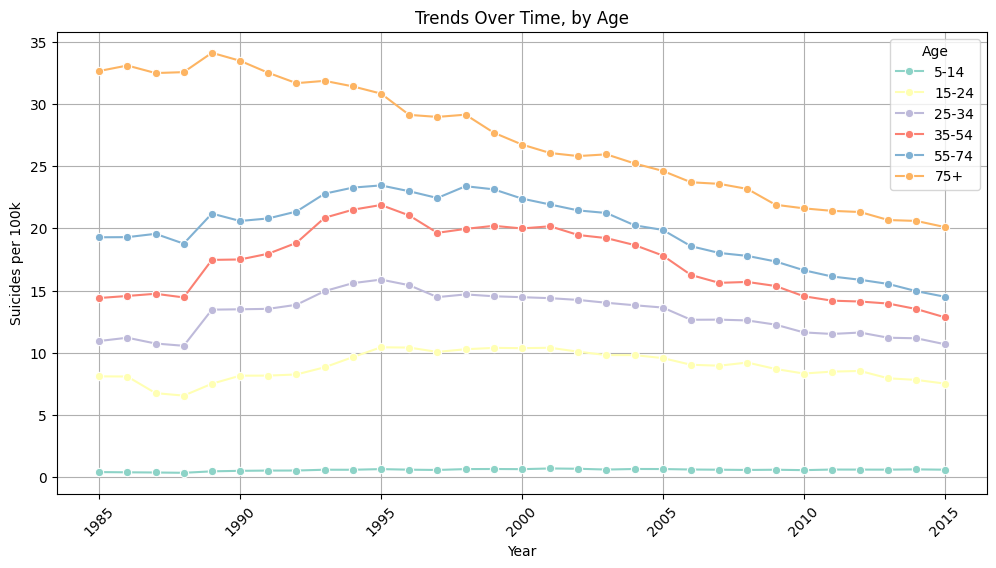

In [24]:
# Calculate suicide rate per 100k by age
age_summary = data.groupby('age').agg({
    'suicides_no': 'sum',
    'population': 'sum'
}).reset_index()
age_summary['suicide_per_100k'] = (age_summary['suicides_no'] / age_summary['population']) * 100000

# Bar plot for suicide rate by age
plt.figure(figsize=(10, 6))
sns.barplot(data=age_summary, x='age', y='suicide_per_100k', hue='age', palette='Set3')
plt.title('Global Suicides (per 100k), by Age')
plt.xlabel('Age')
plt.ylabel('Suicides per 100k')
plt.legend(title='Age', loc='upper right')
plt.xticks(rotation=0)
plt.show()

# Calculate suicide rate per 100k by year and age
age_time_summary = data.groupby(['year', 'age']).agg({
    'suicides_no': 'sum',
    'population': 'sum'
}).reset_index()
age_time_summary['suicide_per_100k'] = (age_time_summary['suicides_no'] / age_time_summary['population']) * 100000

# Line plot for trends over time by age
plt.figure(figsize=(12, 6))
sns.lineplot(data=age_time_summary, x='year', y='suicide_per_100k', hue='age', marker='o', palette='Set3')
plt.title('Trends Over Time, by Age')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k')
plt.legend(title='Age', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\surap\AppData\Local\Temp\ipykernel_2916\488893284.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_summary = data.groupby(['country', 'continent']).agg({


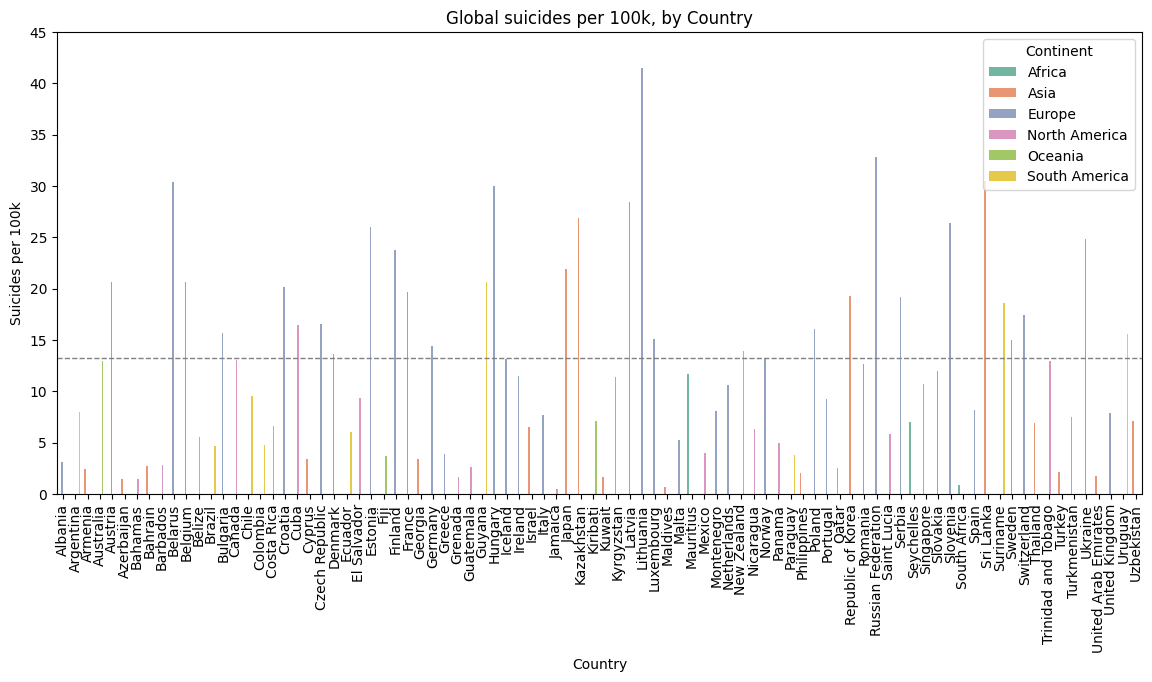

In [25]:
# Calculate suicide rate per 100k by country and continent
country_summary = data.groupby(['country', 'continent']).agg({
    'suicides_no': 'sum',
    'population': 'sum'
}).reset_index()
country_summary['suicide_per_100k'] = (country_summary['suicides_no'] / country_summary['population']) * 100000

# Sort by suicide rate per 100k
country_summary = country_summary.sort_values(by='suicide_per_100k', ascending=False)

# Bar plot for suicide rate by country
plt.figure(figsize=(14, 6))
sns.barplot(data=country_summary, x='country', y='suicide_per_100k', hue='continent', palette='Set2')
plt.axhline(y=global_average, linestyle='--', color='grey', linewidth=1)
plt.title('Global suicides per 100k, by Country')
plt.xlabel('Country')
plt.ylabel('Suicides per 100k')
plt.xticks(rotation=90)
plt.ylim(0, 45)
plt.legend(title='Continent', loc='upper right')
plt.show()

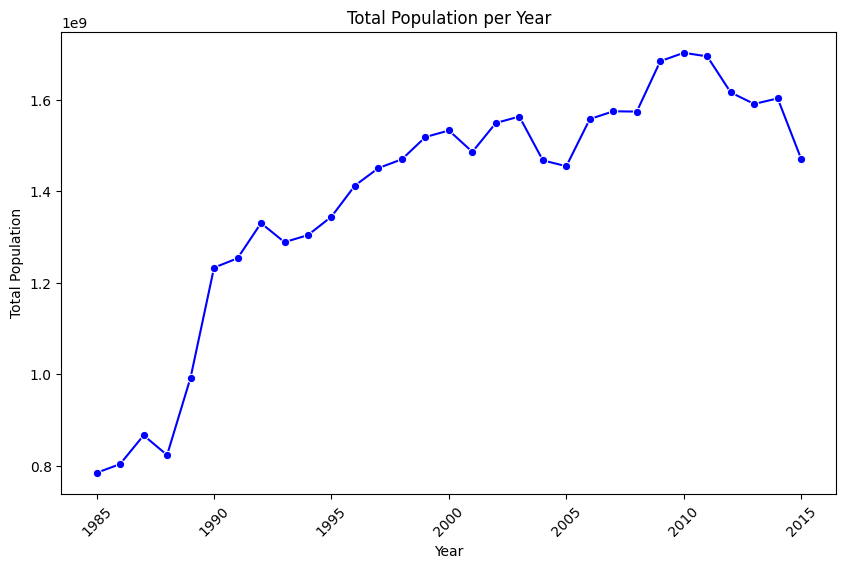

In [26]:
population_per_year = data.groupby('year')['population'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='population', data=population_per_year, marker='o', color='b')
plt.title('Total Population per Year')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.xticks(rotation=45)
plt.show()

C:\Users\surap\AppData\Local\Temp\ipykernel_22500\1862489922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='suicides_no', data=suicides_per_year, palette='viridis')


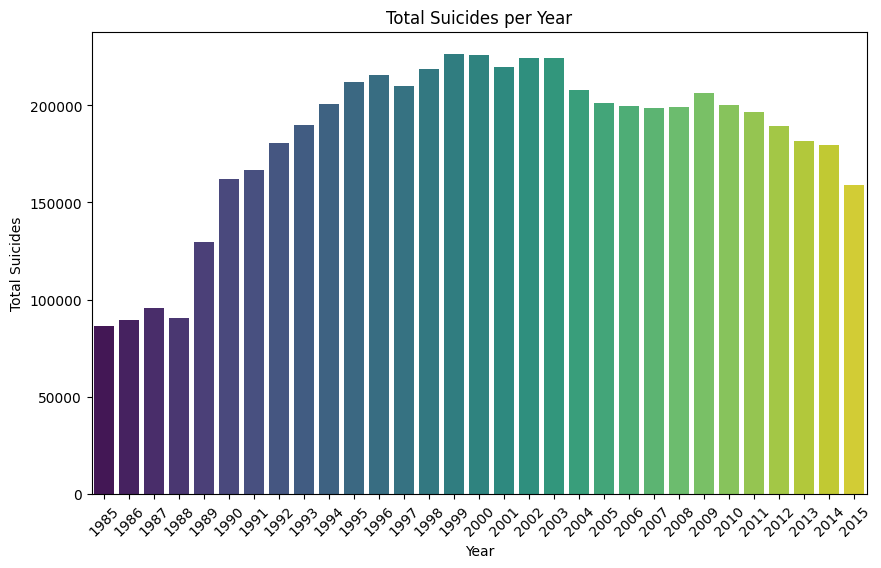

In [38]:
suicides_per_year = data.groupby('year')['suicides_no'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='suicides_no', data=suicides_per_year, palette='viridis')
plt.title('Total Suicides per Year')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.xticks(rotation=45)
plt.show()

In [27]:


# Total suicides
total_suicides = data['suicides_no'].sum()

# Average suicides per year
average_suicides_per_year = data.groupby('year')['suicides_no'].sum().mean()

# Total population
total_population = data['population'].sum()

# Average population per year
average_population_per_year = data.groupby('year')['population'].sum().mean()

# Number of countries
number_of_countries = data['country'].nunique()

# Number of years
number_of_years = data['year'].nunique()

# Display the results
print(f"Total Suicides: {total_suicides}")
print(f"Average Suicides per Year: {average_suicides_per_year}")
print(f"Total Population: {total_population}")
print(f"Average Population per Year: {average_population_per_year}")
print(f"Number of Countries: {number_of_countries}")
print(f"Number of Years: {number_of_years}")


Total Suicides: 5689101
Average Suicides per Year: 183519.38709677418
Total Population: 43007579333
Average Population per Year: 1387341268.8064516
Number of Countries: 88
Number of Years: 31


In [28]:

# Group by age and calculate the sum of suicides and population for each group
age_summary = data.groupby('age').agg({
    'suicides_no': 'sum',
    'population': 'sum'
}).reset_index()

# Calculate suicide rates per 100,000 people for each age group
age_summary['suicide_per_100k'] = (age_summary['suicides_no'] / age_summary['population']) * 100000

# Display the summary
print(age_summary)

# Find the average suicide rate for each age group
age_averages = age_summary[['age', 'suicide_per_100k']]
print(age_averages)



     age  suicides_no   population  suicide_per_100k
0   5-14        43281   7170712841          0.603580
1  15-24       664648   7360844886          9.029507
2  25-34       938088   7116432203         13.181999
3  35-54      2061777  11922633602         17.292966
4  55-74      1426626   7289960386         19.569736
5    75+       554681   2146995415         25.835221
     age  suicide_per_100k
0   5-14          0.603580
1  15-24          9.029507
2  25-34         13.181999
3  35-54         17.292966
4  55-74         19.569736
5    75+         25.835221


C:\Users\surap\AppData\Local\Temp\ipykernel_2916\3243181903.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_summary = data.groupby('age').agg({


In [29]:

# Print unique values in the 'sex' column
print(data['sex'].unique())

# Group by gender and calculate the sum of suicides and population for each gender
gender_summary = data.groupby('sex').agg({
    'suicides_no': 'sum',
    'population': 'sum'
}).reset_index()

# Calculate suicide rates per 100,000 people for each gender
gender_summary['suicide_per_100k'] = (gender_summary['suicides_no'] / gender_summary['population']) * 100000

# Display the summary
print(gender_summary)

# Check if there are rows for male and female
male_summary = gender_summary[gender_summary['sex'].str.lower() == 'male']
female_summary = gender_summary[gender_summary['sex'].str.lower() == 'female']

print("Male summary:", male_summary)
print("Female summary:", female_summary)

# Extract the average suicide rates for each gender if they exist
if not male_summary.empty:
    male_suicide_rate = male_summary['suicide_per_100k'].iloc[0]
else:
    male_suicide_rate = None

if not female_summary.empty:
    female_suicide_rate = female_summary['suicide_per_100k'].iloc[0]
else:
    female_suicide_rate = None

print(f"Average suicide rate for males: {male_suicide_rate} per 100,000 people")
print(f"Average suicide rate for females: {female_suicide_rate} per 100,000 people")


['Male', 'Female']
Categories (2, object): ['Female', 'Male']
      sex  suicides_no   population  suicide_per_100k
0  Female      1341039  22026366644          6.088335
1    Male      4348062  20981212689         20.723597
Male summary:     sex  suicides_no   population  suicide_per_100k
1  Male      4348062  20981212689         20.723597
Female summary:       sex  suicides_no   population  suicide_per_100k
0  Female      1341039  22026366644          6.088335
Average suicide rate for males: 20.72359717453127 per 100,000 people
Average suicide rate for females: 6.088335047148142 per 100,000 people


C:\Users\surap\AppData\Local\Temp\ipykernel_2916\1846585266.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_summary = data.groupby('sex').agg({


    year  suicides_no  population  suicide_per_100k
0   1985        86346   784575812         11.005437
1   1986        89468   803661343         11.132550
2   1987        95787   866540029         11.053961
3   1988        90324   823446260         10.969022
4   1989       129699   992684309         13.065483
5   1990       162089  1233271325         13.143012
6   1991       166875  1253696690         13.310636
7   1992       180688  1330585106         13.579590
8   1993       190135  1288948567         14.751170
9   1994       200558  1304380062         15.375733
10  1995       211968  1344783348         15.762242
11  1996       215507  1412771944         15.254196
12  1997       209952  1450976107         14.469708
13  1998       218702  1470215343         14.875508
14  1999       226630  1518844120         14.921215
15  2000       226166  1533188314         14.751352
16  2001       219742  1486355848         14.783943
17  2002       224195  1549605634         14.467875
18  2003    

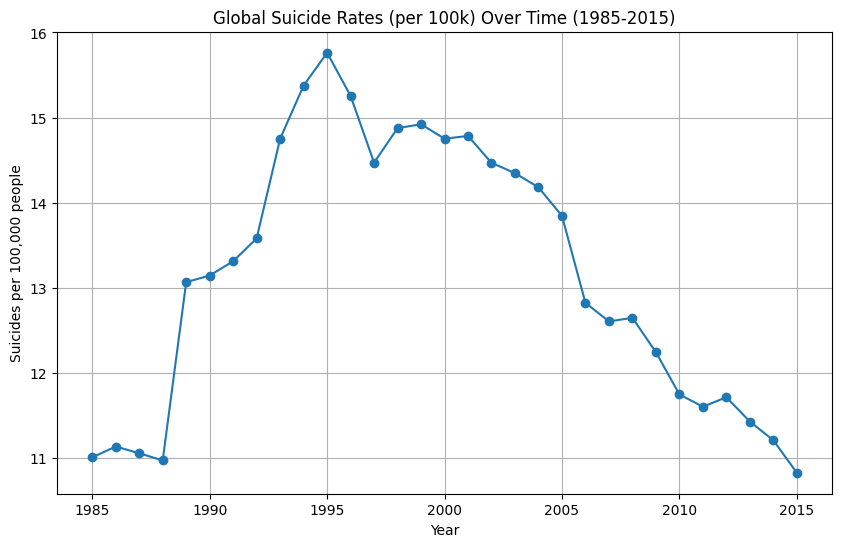

In [30]:

# Ensure your 'data' DataFrame is properly loaded
# Group data by year and calculate the total number of suicides and total population for each year
yearly_summary = data.groupby('year').agg({
    'suicides_no': 'sum',
    'population': 'sum'
}).reset_index()

# Calculate the suicide rate per 100,000 people
yearly_summary['suicide_per_100k'] = (yearly_summary['suicides_no'] / yearly_summary['population']) * 100000

# Print yearly summary to check the results
print(yearly_summary)

# Extract average suicide rates for specific years for the write-up
average_1985 = yearly_summary[yearly_summary['year'] == 1985]['suicide_per_100k'].values[0]
average_2015 = yearly_summary[yearly_summary['year'] == 2015]['suicide_per_100k'].values[0]

print(f"Average suicide rate in 1985: {average_1985} per 100,000 people")
print(f"Average suicide rate in 2015: {average_2015} per 100,000 people")

# Plotting the trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_summary['year'], yearly_summary['suicide_per_100k'], marker='o', linestyle='-')
plt.title('Global Suicide Rates (per 100k) Over Time (1985-2015)')
plt.xlabel('Year')
plt.ylabel('Suicides per 100,000 people')
plt.grid(True)
plt.show()


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'country_year', 'gdp_for_year', 'gdp_per_capita', 'generation',
       'continent', 'suicide_per_100k'],
      dtype='object')


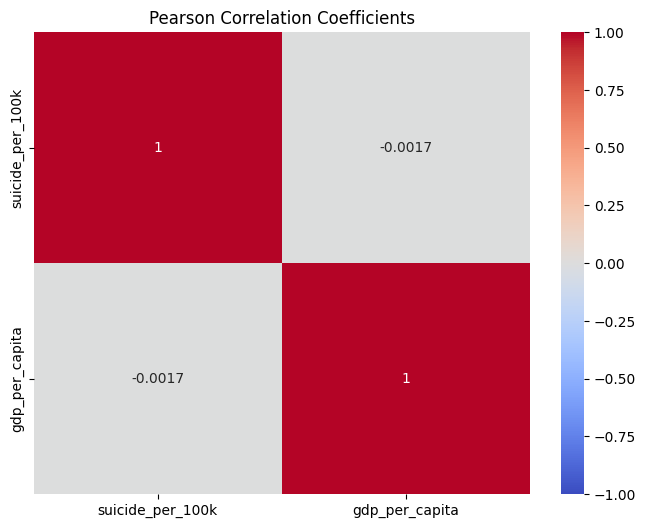

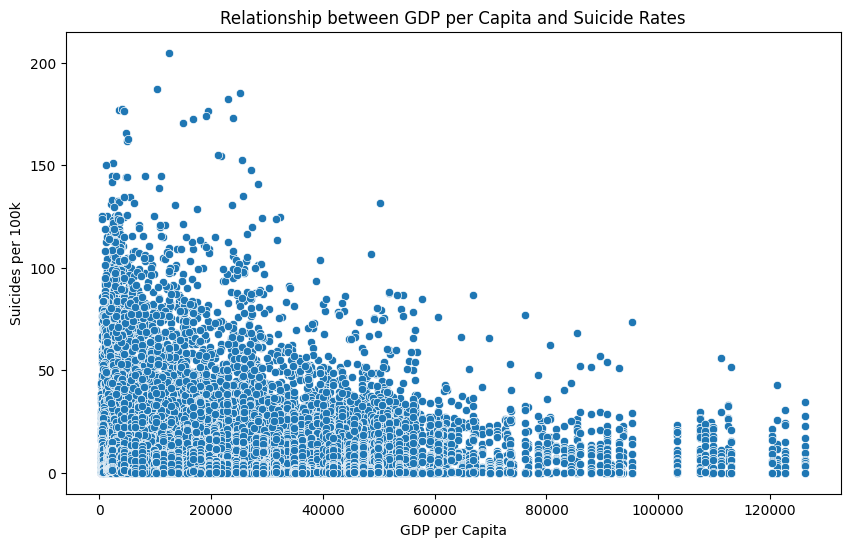

In [31]:
data['suicide_per_100k'] = (data['suicides_no'] / data['population']) * 100000

# Verify column names in your dataset
print(data.columns)

# Compute Pearson correlation coefficients
correlation_matrix = data[['suicide_per_100k', 'gdp_per_capita']].corr(method='pearson')

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Coefficients')
plt.show()

# Scatter plot to visualize relationship between variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_per_capita', y='suicide_per_100k', data=data)
plt.title('Relationship between GDP per Capita and Suicide Rates')
plt.xlabel('GDP per Capita')
plt.ylabel('Suicides per 100k')
plt.show()